In [1]:
## Alway run this block first! 
%matplotlib inline
# coding=utf-8

# for solving division problem
from __future__ import division

## Imports
import sys
sys.path.extend(['/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/codePython/collateralOptimizer/'])
import numpy as np
import pandas as pd
from cvxopt import matrix
from cvxopt import solvers
from sklearn.covariance import *
from rollingCovarianceEstimation import *
from quadraticProgrammingOptim import *

In [2]:
%who

EllipticEnvelope	 EmpiricalCovariance	 GraphLasso	 GraphLassoCV	 LedoitWolf	 MinCovDet	 OAS	 ShrunkCovariance	 datetime	 
division	 empirical_covariance	 fast_mcd	 getRollingCovariance	 graph_lasso	 ledoit_wolf	 ledoit_wolf_shrinkage	 log_likelihood	 matrix	 
np	 oas	 pd	 plt	 runQuadOptimizer	 runQuadOptimizer_globalMinVar	 shrunk_covariance	 solvers	 sys	 



In [84]:
## Main
# Set path & get rolling covariance estimate (MLE only at this stage!)
filePath = '/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/data/noStaleX_returnsData_20160825.csv'
winSize  = 160
rollObj  = getRollingCovariance(filePath=filePath, winSize=winSize)
r        = rollObj['rollCov']
df       = rollObj['df']

# Select rolling covariance matrices
s = r[df.index[range(winSize, df.shape[0], winSize)]]
print "#!# Done with data-prep #!#\n"

# Feed rolling covariance matrices into solver
bucket = pd.DataFrame(index=range(0, df.shape[1]), data=range(0, df.shape[1]), columns=['test'])
for item in s:
    container = runQuadOptimizer(r[item].as_matrix())
    fill      = pd.DataFrame(data=container['xOptScaled'], columns=[item])
    bucket    = pd.concat([bucket, fill], axis=1)

bucket = bucket.drop('test', axis=1)
historicalWeights = bucket
historicalWeights.index = rollObj['df'].columns
del bucket


#!# Done with data-prep #!#

     pcost       dcost       gap    pres   dres
 0:  6.1898e-02 -3.8984e+01  4e+01  8e-17  2e+01
 1:  6.1398e-02 -5.6131e-01  6e-01  7e-16  3e-01
 2:  4.7478e-02 -6.3298e-02  1e-01  7e-16  5e-02
 3:  3.3198e-02 -1.0995e-02  4e-02  7e-16  1e-02
 4:  2.3676e-02 -5.5102e-03  3e-02  2e-15  2e-03
 5:  2.0292e-02  3.5498e-03  2e-02  4e-15  3e-18
 6:  1.8266e-02  1.5210e-02  3e-03  2e-15  3e-18
 7:  1.7567e-02  1.6982e-02  6e-04  1e-15  3e-18
 8:  1.7362e-02  1.7323e-02  4e-05  2e-15  3e-18
 9:  1.7343e-02  1.7340e-02  3e-06  3e-15  2e-18
10:  1.7341e-02  1.7341e-02  9e-08  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3298e-01 -1.5882e+01  2e+01  3e-17  1e+01
 1:  1.2985e-01 -3.4140e-01  5e-01  3e-16  5e-01
 2:  9.1601e-02 -1.8135e-02  1e-01  3e-16  8e-02
 3:  6.2307e-02 -2.6570e-02  9e-02  1e-15  3e-02
 4:  5.1347e-02 -4.5056e-02  1e-01  2e-15  2e-17
 5:  4.0908e-02  1.8023e-02  2e-02  1e-15  1e-17
 6:  3.6384e-02  2

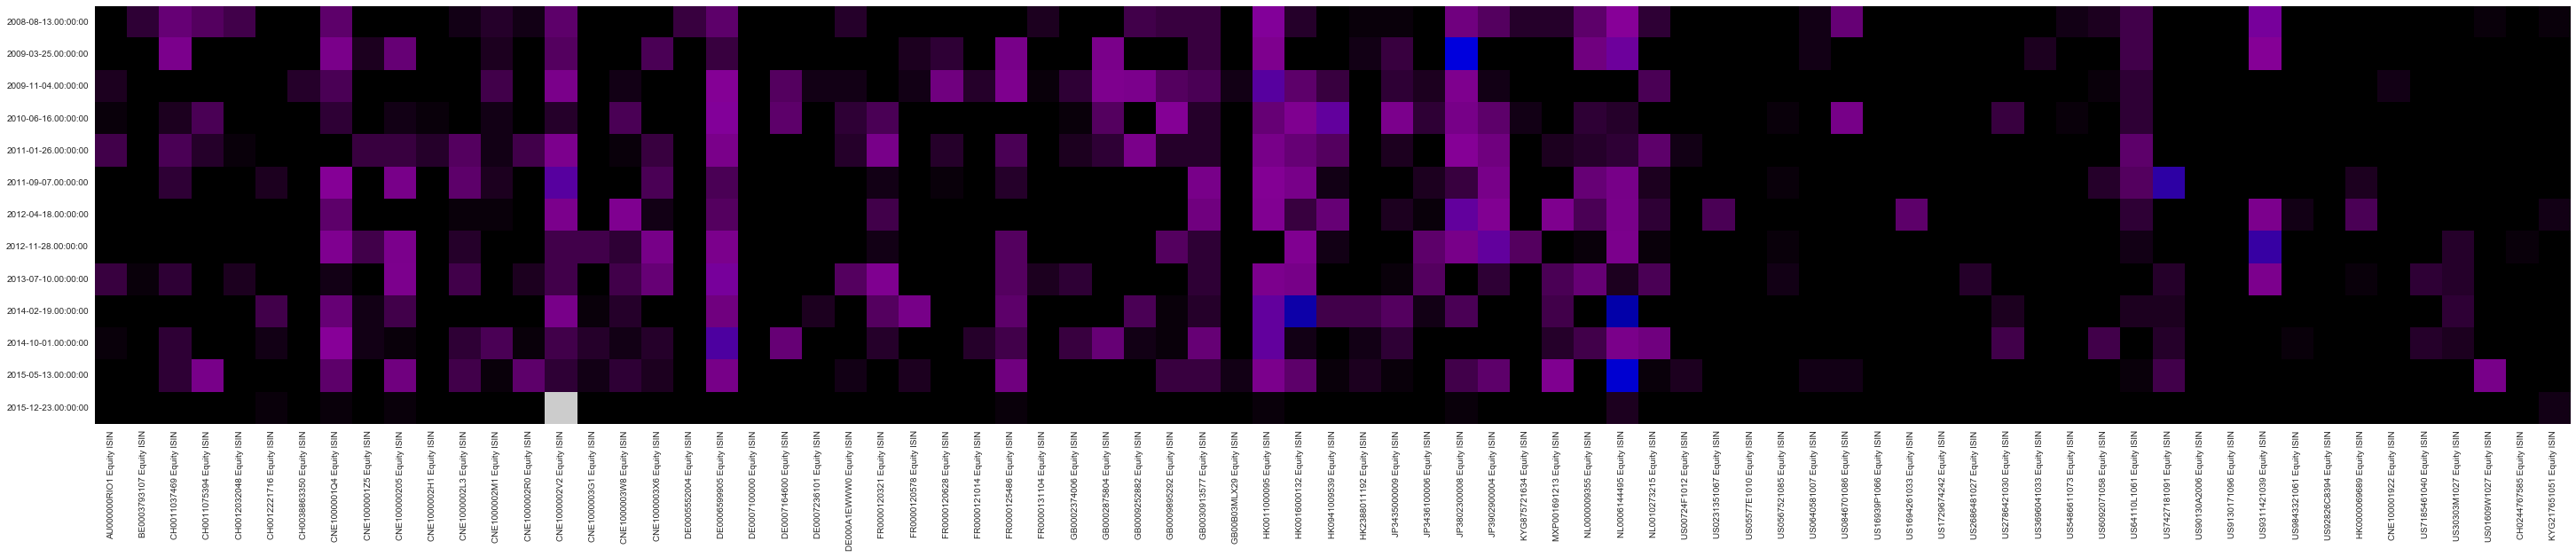

In [94]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import product
from string import ascii_uppercase
from matplotlib import patheffects

m, n = historicalWeights.shape[1], historicalWeights.shape[0] # 4 rows, 7 columns
df = historicalWeights.transpose()

fig, ax = plt.subplots(figsize=(50,80), dpi=300)
ax.imshow(df, interpolation='nearest', cmap=plt.cm.spectral).axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(df.columns, rotation=90)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(df.index)

ax.grid('off')
plt.savefig("matrixPlot" 
            + "_rollingAssetWeights" + "_specs_m_" + str(m) + "_by_n_" + str(n)
            + "_" + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
            + ".eps", format='eps', dpi=300, bbox_inches='tight')
#plt.show()



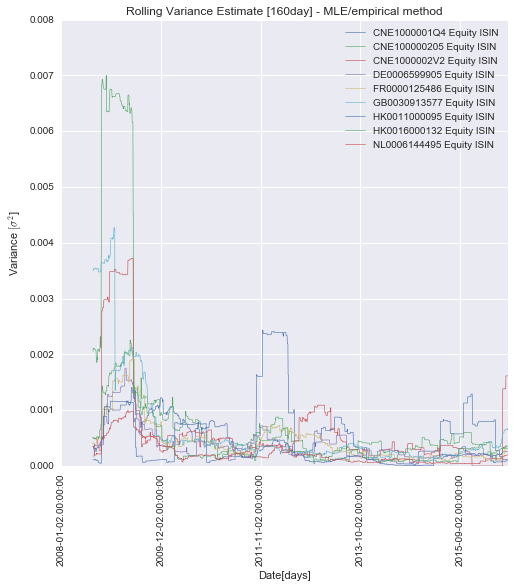

In [141]:
listAssets = ['CNE1000001Q4 Equity ISIN', 'CNE100000205 Equity ISIN', 'CNE1000002V2 Equity ISIN', 'DE0006599905 Equity ISIN', 
 'FR0000125486 Equity ISIN', 'GB0030913577 Equity ISIN', 'HK0011000095 Equity ISIN', 'HK0016000132 Equity ISIN',
'NL0006144495 Equity ISIN']

for item in listAssets:
    rollObj['rollCov'].loc[:, item, item].plot(figsize=(8,8), 
                                               rot=90, 
                                               linestyle='-', 
                                               label=item, 
                                               linewidth=.6,
                                               title='Rolling Variance Estimate [160day] - MLE/empirical method')
    
plt.legend(loc='upper right')
plt.xlabel('Date[days]')
plt.ylabel('Variance $[\sigma^2$]')
plt.savefig("tsPlot" 
            + "_rollingAssetVar" + "_specs_m_" + str(m) + "_by_n_" + str(n)
            + "_" + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
            + ".eps", format='eps', dpi=300, bbox_inches='tight')
#plt.show()






In [6]:
## Main
# Set path & get rolling covariance estimate (MLE only at this stage!)
filePath = '/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/data/noStaleX_returnsData_20160825.csv'
winSize  = 160
covSize  = 20
rollObj  = getRollingCovariance(filePath=filePath, winSize=winSize)
r        = rollObj['rollCov']
df       = rollObj['df']
n        = df.shape[1]

# Select rolling covariance matrices
s = r[df.index[range(winSize, df.shape[0], covSize)]]
print "#!# Done with data-prep #!#\n"

# Feed rolling covariance matrices into solver
bucket  = pd.DataFrame(index=range(0, df.shape[1]), data=range(0, df.shape[1]), columns=['test'])
eqVec   = np.asarray([1/n] * n)
vector1 = []
vector2 = []
vector3 = []
for item in s:
    # MaxDiv Step
    container = runQuadOptimizer(r[item].as_matrix())
    fill      = pd.DataFrame(data=container['xOptScaled'], columns=[item])
    bucket    = pd.concat([bucket, fill], axis=1)
    varMaxDiv = np.dot(fill.transpose(),np.dot(r[item].as_matrix(), fill))
    vector1.append(varMaxDiv)
    
    # MinVar Step
    container = runQuadOptimizer_globalMinVar(r[item].as_matrix())
    fill      = pd.DataFrame(data=container['xOptScaled'], columns=[item])
    varMinVar = np.dot(fill.transpose(),np.dot(r[item].as_matrix(), fill))
    vector3.append(varMinVar)
    
    # 1/n Step
    varEqual  = np.dot(eqVec.transpose(),np.dot(r[item].as_matrix(), eqVec))
    vector2.append(varEqual)

# Fix poor formatting of the maxDiversification etc. vector
def getNumVec(vec):
    numVec = []
    for item in vec:
         numVec.append(item[0][0])
    return numVec

vector1 = getNumVec(vector1)
vector3 = getNumVec(vector3)    

# New containers for calculated portfolio variances 
historicalVariances = pd.DataFrame([vector1, vector2, vector3]).transpose()
historicalVariances.index = s.items
historicalVariances.columns = ['MaxDiversification', 'EqualWeight', 'MinGlobalVariance']
del vector1, vector2, vector3, numVec, eqVec
        
bucket = bucket.drop('test', axis=1)
historicalWeights = bucket
historicalWeights.index = rollObj['df'].columns
del bucket


#!# Done with data-prep #!#

     pcost       dcost       gap    pres   dres
 0:  6.1898e-02 -3.8984e+01  4e+01  8e-17  2e+01
 1:  6.1398e-02 -5.6131e-01  6e-01  7e-16  3e-01
 2:  4.7478e-02 -6.3298e-02  1e-01  7e-16  5e-02
 3:  3.3198e-02 -1.0995e-02  4e-02  7e-16  1e-02
 4:  2.3676e-02 -5.5102e-03  3e-02  2e-15  2e-03
 5:  2.0292e-02  3.5498e-03  2e-02  4e-15  3e-18
 6:  1.8266e-02  1.5210e-02  3e-03  1e-15  3e-18
 7:  1.7567e-02  1.6982e-02  6e-04  1e-15  3e-18
 8:  1.7362e-02  1.7323e-02  4e-05  1e-15  3e-18
 9:  1.7343e-02  1.7340e-02  3e-06  2e-15  3e-18
10:  1.7341e-02  1.7341e-02  9e-08  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1276e-05 -1.0000e+00  1e+00  3e-17  9e+00
 1:  4.1266e-05 -1.0045e-02  1e-02  4e-16  9e-02
 2:  4.0322e-05 -1.4299e-04  2e-04  4e-16  2e-03
 3:  2.4955e-05 -2.3525e-05  5e-05  5e-16  4e-04
 4:  1.1400e-05 -1.6611e-05  3e-05  3e-16  2e-19
 5:  8.5943e-06  1.0236e-06  8e-06  4e-16  1e-19
 6:  6.8714e-06  5

NameError: name 'numVec' is not defined

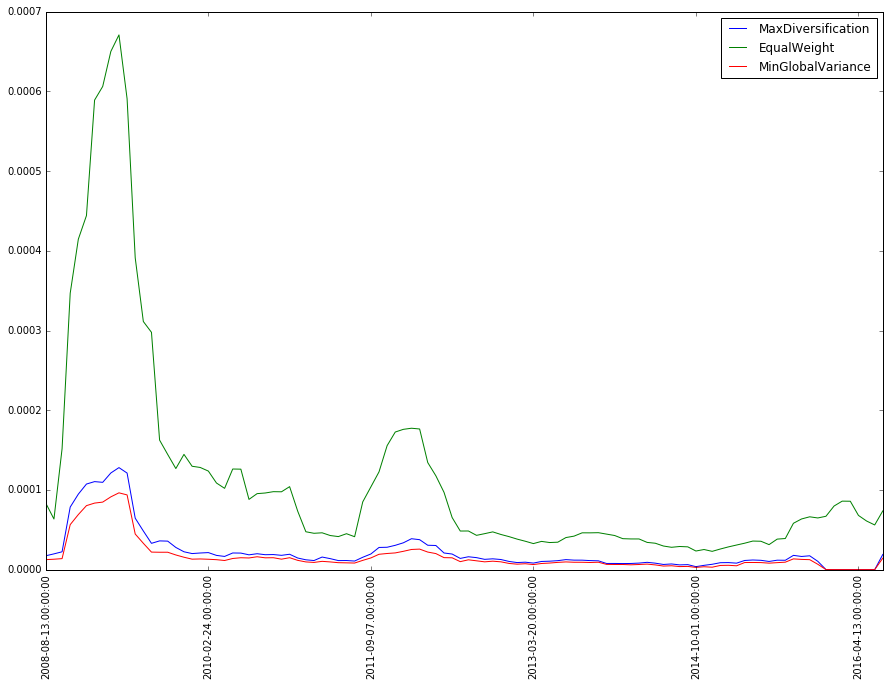

In [11]:
historicalVariances.plot(rot=90, figsize=(15,10))

In [8]:
historicalVariances

,MaxDiversification,EqualWeight,MinGlobalVariance
2008-08-13.00:00:00,1.745066e-05,0.000083,1.258529e-05
2008-09-10.00:00:00,1.982814e-05,0.000064,1.311282e-05
2008-10-08.00:00:00,2.242814e-05,0.000152,1.386270e-05
2008-11-05.00:00:00,7.850563e-05,0.000347,5.648755e-05
2008-12-03.00:00:00,9.475924e-05,0.000415,6.913304e-05
2008-12-31.00:00:00,1.074163e-04,0.000444,8.033531e-05
2009-01-28.00:00:00,1.104753e-04,0.000589,8.352451e-05
2009-02-25.00:00:00,1.095691e-04,0.000606,8.477877e-05
2009-03-25.00:00:00,1.213005e-04,0.000650,9.134021e-05
2009-04-22.00:00:00,1.280401e-04,0.000671,9.639920e-05
